In [ ]:
# HW Module 4
# mchepelva
#

In [ ]:
In this exercise the task is to predict the mice sex (male or female) based on the following parameters: starting age, ending age, starting weight, ending weight, weight change, bleeding time, ionized Ca in blood, blood pH, bone mineral density, lean tissues weight and fat weight.



 Load the Mice dataset from the folowing location: 'http://edu.modas.lu/data/txt/mice.txt'.

 The dataset contains some missing values. Remove the observations (rows) with NaN values (hint: pandas.DataFrame.dropna).

 Extract the labels (sex) and features (starting age, ending age, starting weight, ending weight, weight change, bleeding time, ionized Ca in blood, blood pH, bone mineral density, lean tissues weight and fat weight) from the Mice dataset.

 Convert categorical labels to numerical (hint: sklearn.preprocessing.LabelEncoder).

 Divide the data into training and test subsets in 75:25 ratio (hint: sklearn.model_selection.train_test_split).

 Scale the data so that the mean of each feature equals zero and standard deviation equals one (hint: sklearn.preprocessing.StandardScaler).

 Train SVM classifier using the training dataset and predict the labels using the test dataset (use linear kernel and RBF kernel).

 Calculate and print classification accuracy (hint: sklearn.metrics.accuracy_score).

 Plot ROC curves for the SVM classifier with linear and RBF kernel on the same plot (hint: sklearn.metrics.[roc_auc_score,roc_curve]).

 Compare the performance to logistic regression classifier used in exercise 1 (module 1)

In [68]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
mice = pd.read_csv('http://edu.modas.lu/data/txt/mice.txt', delimiter='\t', index_col=None) 
mice.head()

,ID,Strain,Sex,Starting age,Ending age,Starting weight,Ending weight,Weight change,Bleeding time,Ionized Ca in blood,Blood pH,Bone mineral density,Lean tissues weight,Fat weight
0,1,129S1/SvImJ,f,66,116.0,19.3,20.5,1.062,64.0,1.20,7.24,0.0605,14.5,4.4
1,2,129S1/SvImJ,f,66,116.0,19.1,20.8,1.089,78.0,1.15,7.27,0.0553,13.9,4.4
2,3,129S1/SvImJ,f,66,108.0,17.9,19.8,1.106,90.0,1.16,7.26,0.0546,13.8,2.9
3,368,129S1/SvImJ,f,72,114.0,18.3,21.0,1.148,65.0,1.26,7.22,0.0599,15.4,4.2
4,369,129S1/SvImJ,f,72,115.0,20.2,21.9,1.084,55.0,1.23,7.30,0.0623,15.6,4.3


In [70]:
# missing values
print(mice.shape)
df = mice.dropna(axis=0)
print(df.shape)

(790, 14)
(759, 14)


In [71]:
# subset cols
df = df.loc[:, 'Sex':'Fat weight']

# Encode categorical
label_encoder = LabelEncoder()
unique_labels = label_encoder.fit(df['Sex']).classes_ # store unique labels for plotting
df['IS_MALE'] = label_encoder.fit_transform(df['Sex'])
df = df.drop(columns = 'Sex')
print(label_encoder.classes_)
df.head()

['f' 'm']


,Starting age,Ending age,Starting weight,Ending weight,Weight change,Bleeding time,Ionized Ca in blood,Blood pH,Bone mineral density,Lean tissues weight,Fat weight,IS_MALE
0,66,116.0,19.3,20.5,1.062,64.0,1.20,7.24,0.0605,14.5,4.4,0
1,66,116.0,19.1,20.8,1.089,78.0,1.15,7.27,0.0553,13.9,4.4,0
2,66,108.0,17.9,19.8,1.106,90.0,1.16,7.26,0.0546,13.8,2.9,0
3,72,114.0,18.3,21.0,1.148,65.0,1.26,7.22,0.0599,15.4,4.2,0
4,72,115.0,20.2,21.9,1.084,55.0,1.23,7.30,0.0623,15.6,4.3,0


In [72]:
# Divide into train/test
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:(df.shape[1]-1)], df['IS_MALE'], test_size=0.25, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(569, 11) (190, 11) (569,) (190,)


In [73]:
# Standardized features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [74]:
C = 100.0 # The amount of regularization
# Train linear SVM
model = SVC(C=C, kernel='linear', probability=True)
model.fit(X_train_std, y_train)
y_pred_lin = model.predict(X_test_std) 
y_pred_proba_lin = model.predict_proba(X_test_std) 
acc = accuracy_score(y_test, y_pred_lin)

In [75]:
# RBF SVM
model2 = SVC(C=100, gamma='auto', kernel='rbf', probability=True)
model2.fit(X_train_std, y_train)
y_pred_rbf = model2.predict(X_test_std) 
y_pred_proba_rbf = model2.predict_proba(X_test_std) 
acc2 = accuracy_score(y_test, y_pred_rbf)

In [76]:
print('Test accuracy for SVM (linear kernel): %.2f' % (acc ))
print('Test accuracy for SVM (radial kernel): %.2f' % (acc2 ))
print('Test accuracy for Logistic regression: 0.76')

Test accuracy for SVM (linear kernel): 0.79
Test accuracy for SVM (radial kernel): 0.84
Test accuracy for Logistic regression: 0.76


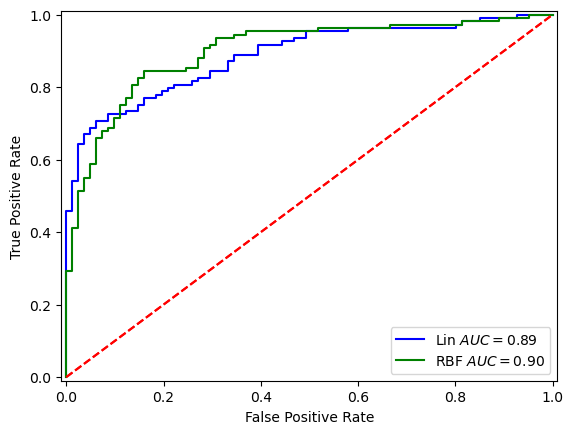

In [77]:
# ROC AUC
# Calculate AUC ROC score
auc = roc_auc_score(y_test, y_pred_proba_lin[:,1])    
# Compute Receiver operating characteristic (ROC), i.e. FPR and TPR for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lin[:,1])    

auc2 = roc_auc_score(y_test, y_pred_proba_rbf[:,1])    
# Compute Receiver operating characteristic (ROC), i.e. FPR and TPR for different thresholds
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_rbf[:,1])    

#print(auc, fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, 'b', label='Lin $AUC=$'+ '%.2f' % auc)
plt.plot(fpr2, tpr2, 'g', label='RBF $AUC=$'+ '%.2f' % auc2)

plt.plot([0, 1], [0, 1],'r--')
plt.rc('axes', labelsize=10)
#plt.r('legend', fontsize=10)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()  